# Extract ObjectTables Results in  OGA

- work with Weakly_2023_44
- use jupyter kernel LSST
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/12/21
- update : 2023/12/23


In [1]:
! eups list -s | grep LOCAL

analysis_tools        LOCAL:/home/d/dagoret/repos/repos_w_2023_44/analysis_tools 	setup
atmospec              LOCAL:/home/d/dagoret/repos/repos_w_2023_44/atmospec 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/eups 	setup
spectractor           LOCAL:/home/d/dagoret/repos/repos_w_2023_44/Spectractor 	setup


In [2]:
! eups list -s lsst_distrib

   g4213664e8e+d053631def 	current w_2023_44 setup


In [3]:
import lsst.daf.butler as dafButler

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm,SymLogNorm


import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch

from astropy.io import fits

import astropy.coordinates as coord
import astropy.units as u

import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [31]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch

from astropy.time import Time
from astropy.coordinates import SkyCoord
from astropy import coordinates

In [6]:
# LSST Display
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

In [7]:
transform = AsinhStretch() + PercentileInterval(99.)

In [8]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

## Configuration

In [9]:
#repo =  "/sdf/group/rubin/repo/main"
repo = "/sdf/group/rubin/repo/oga/"
butler = dafButler.Butler(repo)
registry = butler.registry

In [10]:
fileobj_out="objectTable_202312.csv"
filetractpatch_out = 'Latiss_tractspatchs_202312.pickle'

## Give the collection

In [11]:
my_collection = "LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553"

## Config

# object

In [12]:
datasetRefs = butler.registry.queryDatasets(datasetType='objectTable', collections=my_collection, where= "instrument='LATISS'")

In [13]:
all_ref_for_src = []
all_objectsTables = []

for i, ref in enumerate(datasetRefs):
    all_ref_for_src.append(ref.dataId)
    print("========================datasetType = objectTable ============================================")
    print("fullId..................:",ref.dataId.full)
    print("skymap...................:",ref.dataId["skymap"])
    print("tract....................:",ref.dataId["tract"])
    print("patch....................:",ref.dataId["patch"])
    print("run......................:",ref.run)
    
    df_tab=  butler.get(ref,collections=my_collection)

    N=len(df_tab)
    df_tab['tabid_idx']= (i*np.ones(N)).astype(int)
    
    all_objectsTables.append(df_tab) 
    

========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5616, patch: 335}
skymap...................: latiss_v1
tract....................: 5616
patch....................: 335
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5634, patch: 91}
skymap...................: latiss_v1
tract....................: 5634
patch....................: 91
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5615, patch: 332}
skymap...................: latiss_v1

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 10644, patch: 166}
skymap...................: latiss_v1
tract....................: 10644
patch....................: 166
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 383, patch: 359}
skymap...................: latiss_v1
tract....................: 383
patch....................: 359
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 8188, patch: 48}
skymap...................: latiss_v

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 3863, patch: 241}
skymap...................: latiss_v1
tract....................: 3863
patch....................: 241
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5615, patch: 333}
skymap...................: latiss_v1
tract....................: 5615
patch....................: 333
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5634, patch: 52}
skymap...................: latiss_v

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 455, patch: 52}
skymap...................: latiss_v1
tract....................: 455
patch....................: 52
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 10644, patch: 184}
skymap...................: latiss_v1
tract....................: 10644
patch....................: 184
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5615, patch: 312}
skymap...................: latiss_v1

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5615, patch: 313}
skymap...................: latiss_v1
tract....................: 5615
patch....................: 313
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z


/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 8188, patch: 65}
skymap...................: latiss_v1
tract....................: 8188
patch....................: 65
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 10644, patch: 183}
skymap...................: latiss_v1
tract....................: 10644
patch....................: 183
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 452, patch: 42}
skymap...................: latiss_v1

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 10644, patch: 201}
skymap...................: latiss_v1
tract....................: 10644
patch....................: 201
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5616, patch: 355}
skymap...................: latiss_v1
tract....................: 5616
patch....................: 355
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z


/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5615, patch: 295}
skymap...................: latiss_v1
tract....................: 5615
patch....................: 295
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5615, patch: 331}
skymap...................: latiss_v1
tract....................: 5615
patch....................: 331
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5615, patch: 276}
skymap...................: latiss_

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 455, patch: 33}
skymap...................: latiss_v1
tract....................: 455
patch....................: 33
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 8188, patch: 47}
skymap...................: latiss_v1
tract....................: 8188
patch....................: 47
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5634, patch: 72}
skymap...................: latiss_v1
trac

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 10644, patch: 161}
skymap...................: latiss_v1
tract....................: 10644
patch....................: 161
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5634, patch: 92}
skymap...................: latiss_v1
tract....................: 5634
patch....................: 92
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5616, patch: 358}
skymap...................: latiss_

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5615, patch: 275}
skymap...................: latiss_v1
tract....................: 5615
patch....................: 275
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 452, patch: 44}
skymap...................: latiss_v1
tract....................: 452
patch....................: 44
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5839, patch: 9}
skymap...................: latiss_v1
tra

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5634, patch: 110}
skymap...................: latiss_v1
tract....................: 5634
patch....................: 110
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5634, patch: 54}
skymap...................: latiss_v1
tract....................: 5634
patch....................: 54
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5634, patch: 71}
skymap...................: latiss_v1


/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 455, patch: 51}
skymap...................: latiss_v1
tract....................: 455
patch....................: 51
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 10644, patch: 207}
skymap...................: latiss_v1
tract....................: 10644
patch....................: 207
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 10644, patch: 188}
skymap...................: latiss_v

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 452, patch: 25}
skymap...................: latiss_v1
tract....................: 452
patch....................: 25
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5616, patch: 337}
skymap...................: latiss_v1
tract....................: 5616
patch....................: 337
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z


/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5615, patch: 294}
skymap...................: latiss_v1
tract....................: 5615
patch....................: 294
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 383, patch: 360}
skymap...................: latiss_v1
tract....................: 383
patch....................: 360
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 3863, patch: 242}
skymap...................: latiss_v1

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 452, patch: 24}
skymap...................: latiss_v1
tract....................: 452
patch....................: 24
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 3863, patch: 260}
skymap...................: latiss_v1
tract....................: 3863
patch....................: 260
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 455, patch: 32}
skymap...................: latiss_v1
tra

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 8188, patch: 46}
skymap...................: latiss_v1
tract....................: 8188
patch....................: 46
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5634, patch: 53}
skymap...................: latiss_v1
tract....................: 5634
patch....................: 53
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 3863, patch: 261}
skymap...................: latiss_v1
t

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5615, patch: 293}
skymap...................: latiss_v1
tract....................: 5615
patch....................: 293
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5839, patch: 7}
skymap...................: latiss_v1
tract....................: 5839
patch....................: 7
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 452, patch: 23}
skymap...................: latiss_v1
tra

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 10644, patch: 202}
skymap...................: latiss_v1
tract....................: 10644
patch....................: 202
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 10643, patch: 171}
skymap...................: latiss_v1
tract....................: 10643
patch....................: 171
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 10643, patch: 190}
skymap...................: la

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5634, patch: 55}
skymap...................: latiss_v1
tract....................: 5634
patch....................: 55
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 455, patch: 53}
skymap...................: latiss_v1
tract....................: 455
patch....................: 53
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5616, patch: 338}
skymap...................: latiss_v1
tra

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 10644, patch: 182}
skymap...................: latiss_v1
tract....................: 10644
patch....................: 182
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 3863, patch: 262}
skymap...................: latiss_v1
tract....................: 3863
patch....................: 262
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5634, patch: 112}
skymap...................: latis

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5634, patch: 111}
skymap...................: latiss_v1
tract....................: 5634
patch....................: 111
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 3863, patch: 224}
skymap...................: latiss_v1
tract....................: 3863
patch....................: 224
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5615, patch: 314}
skymap...................: latiss_

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 10644, patch: 189}
skymap...................: latiss_v1
tract....................: 10644
patch....................: 189
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 10644, patch: 208}
skymap...................: latiss_v1
tract....................: 10644
patch....................: 208
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 455, patch: 34}
skymap...................: latis

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5616, patch: 317}
skymap...................: latiss_v1
tract....................: 5616
patch....................: 317
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 10644, patch: 164}
skymap...................: latiss_v1
tract....................: 10644
patch....................: 164
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 455, patch: 15}
skymap...................: latiss_

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 3863, patch: 223}
skymap...................: latiss_v1
tract....................: 3863
patch....................: 223
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 10644, patch: 181}
skymap...................: latiss_v1
tract....................: 10644
patch....................: 181
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5634, patch: 74}
skymap...................: latiss

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5634, patch: 73}
skymap...................: latiss_v1
tract....................: 5634
patch....................: 73
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 455, patch: 13}
skymap...................: latiss_v1
tract....................: 455
patch....................: 13
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 8188, patch: 27}
skymap...................: latiss_v1
trac

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 10644, patch: 165}
skymap...................: latiss_v1
tract....................: 10644
patch....................: 165
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 382, patch: 342}
skymap...................: latiss_v1
tract....................: 382
patch....................: 342
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5839, patch: 8}
skymap...................: latiss_v1

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 10644, patch: 162}
skymap...................: latiss_v1
tract....................: 10644
patch....................: 162
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 452, patch: 62}
skymap...................: latiss_v1
tract....................: 452
patch....................: 62
run......................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========================datasetType = objectTable ============================================
fullId..................: {skymap: 'latiss_v1', tract: 5615, patch: 274}
skymap...................: latiss_v1

/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)
/tmp/ipykernel_46291/2883751763.py:13: UserWarning: Collections should not be specified with DatasetRef
  df_tab=  butler.get(ref,collections=my_collection)


In [14]:
len(all_objectsTables)

98

In [15]:
all_objectsTables[0]

column,coord_raErr,footprintArea,deblend_nChild,xErr,shape_flag,coord_decErr,detect_isPatchInner,detect_isPrimary,detect_isDeblendedModelSource,ebv,coord_dec,shape_yy,parentObjectId,detect_isDeblendedSource,refBand,y,shape_xx,sky_object,deblend_incompleteData,refFwhm,coord_ra,detect_fromBlend,detect_isIsolated,x,detect_isTractInner,merge_peak_sky,coord_ra_dec_Cov,deblend_skipped,shape_xy,refExtendedness,yErr,xy_flag,tract,patch,i_ra,i_dec,i_decl,i_raErr,i_decErr,i_ra_dec_Cov,i_psfFlux,i_psfFluxErr,i_free_psfFlux,i_free_psfFluxErr,i_free_psfFlux_flag,i_bdE1,i_bdE2,i_bdReB,i_bdReD,i_bdChi2,i_bdFluxB,i_bdFluxBErr,i_bdFluxD,i_bdFluxDErr,i_gaapPsfFlux,i_gaapPsfFluxErr,i_gaap0p7Flux,i_gaap0p7FluxErr,i_gaap1p0Flux,i_gaap1p0FluxErr,i_gaap1p5Flux,i_gaap1p5FluxErr,i_gaap2p5Flux,i_gaap2p5FluxErr,i_gaap3p0Flux,i_gaap3p0FluxErr,i_gaapOptimalFlux,i_gaapOptimalFluxErr,i_ixx,i_iyy,i_ixy,i_i_flag,i_ixxPSF,i_iyyPSF,i_ixyPSF,i_iPSF_flag,i_ixxRound,i_iyyRound,i_ixyRound,i_iRound_flag,i_ixxDebiasedPSF,i_iyyDebiasedPSF,i_ixyDebiasedPSF,i_iDebiasedPSF_flag,i_kronRad,i_kronFlux,i_kronFluxErr,i_calibFlux,i_calibFluxErr,i_ap03Flux,i_ap03FluxErr,i_ap03Flux_flag,i_ap06Flux,i_ap06FluxErr,i_ap06Flux_flag,i_ap09Flux,i_ap09FluxErr,i_ap09Flux_flag,i_ap12Flux,i_ap12FluxErr,i_ap12Flux_flag,i_ap17Flux,i_ap17FluxErr,i_ap17Flux_flag,i_ap25Flux,i_ap25FluxErr,i_ap25Flux_flag,i_ap35Flux,i_ap35FluxErr,i_ap35Flux_flag,i_ap50Flux,i_ap50FluxErr,i_ap50Flux_flag,i_ap70Flux,i_ap70FluxErr,i_ap70Flux_flag,i_extendedness,i_blendedness,i_fwhm,i_cModelFlux,i_cModelFluxErr,i_cModelFlux_inner,i_free_cModelFlux,i_free_cModelFluxErr,i_free_cModelFlux_inner,i_free_cModelFlux_flag,i_hsmShapeRegauss_e1,i_hsmShapeRegauss_e2,i_hsmShapeRegauss_sigma,i_hsmShapeRegauss_flag,i_inputCount,i_dataCoverage,i_inputCount_flag,i_inputCount_flag_noInputs,i_psfFlux_area,i_psfFlux_flag,i_psfFlux_flag_apCorr,i_psfFlux_flag_edge,i_psfFlux_flag_noGoodPixels,i_cModel_flag,i_cModel_flag_apCorr,i_gaapFlux_flag,i_gaapFlux_flag_edge,i_gaapFlux_flag_gaussianization,i_gaapOptimalFlux_flag_bigPsf,i_gaap0p7Flux_flag_bigPsf,i_gaap1p0Flux_flag_bigPsf,i_gaap1p5Flux_flag_bigPsf,i_gaap2p5Flux_flag_bigPsf,i_gaap3p0Flux_flag_bigPsf,i_blendedness_flag,i_pixelFlags_bad,i_pixelFlags_clipped,i_pixelFlags_clippedCenter,i_pixelFlags_cr,i_pixelFlags_crCenter,i_pixelFlags_edge,i_pixelFlags_inexact_psf,i_pixelFlags_inexact_psfCenter,i_pixelFlags_interpolated,i_pixelFlags_interpolatedCenter,i_pixelFlags_offimage,i_pixelFlags_saturated,i_pixelFlags_saturatedCenter,i_pixelFlags_sensor_edge,i_pixelFlags_sensor_edgeCenter,i_pixelFlags_suspect,i_pixelFlags_suspectCenter,i_pixelFlags_streak,i_pixelFlags_streakCenter,i_extendedness_flag,i_calib_astrometry_used,i_calib_photometry_reserved,i_calib_photometry_used,i_calib_psf_candidate,i_calib_psf_reserved,i_calib_psf_used,i_apFlux_flag,i_apFlux_flag_apertureTruncated,i_apFlux_flag_sincCoeffsTruncated,i_calibFlux_flag,i_calibFlux_flag_apertureTruncated,i_calibFlux_flag_sincCoeffsTruncated,i_centroid_flag,i_centroid_x,i_centroid_xErr,i_centroid_y,i_centroid_yErr,i_kronFlux_flag,i_kronFlux_flag_bad_radius,i_kronFlux_flag_bad_shape,i_kronFlux_flag_bad_shape_no_psf,i_kronFlux_flag_edge,i_kronFlux_flag_no_fallback_radius,i_kronFlux_flag_no_minimum_radius,i_kronFlux_flag_small_radius,i_kronFlux_flag_used_minimum_radius,i_kronFlux_flag_used_psf_radius,g_ra,g_dec,g_decl,g_raErr,g_decErr,g_ra_dec_Cov,g_psfFlux,g_psfFluxErr,g_free_psfFlux,g_free_psfFluxErr,g_free_psfFlux_flag,g_bdE1,g_bdE2,g_bdReB,g_bdReD,g_bdChi2,g_bdFluxB,g_bdFluxBErr,g_bdFluxD,g_bdFluxDErr,g_gaapPsfFlux,g_gaapPsfFluxErr,g_gaap0p7Flux,g_gaap0p7FluxErr,g_gaap1p0Flux,g_gaap1p0FluxErr,g_gaap1p5Flux,g_gaap1p5FluxErr,g_gaap2p5Flux,g_gaap2p5FluxErr,g_gaap3p0Flux,g_gaap3p0FluxErr,g_gaapOptimalFlux,g_gaapOptimalFluxErr,g_ixx,g_iyy,g_ixy,g_i_flag,g_ixxPSF,g_iyyPSF,g_ixyPSF,g_iPSF_flag,g_ixxRound,g_iyyRound,g_ixyRound,g_iRound_flag,g_ixxDebiasedPSF,g_iyyDebiasedPSF,g_ixyDebiasedPSF,g_iDebiasedPSF_flag,g_kronRad,g_kronFlux,g_kronFluxErr,g_ca

In [16]:
df=pd.concat(all_objectsTables)

In [17]:
df

column,coord_raErr,footprintArea,deblend_nChild,xErr,shape_flag,coord_decErr,detect_isPatchInner,detect_isPrimary,detect_isDeblendedModelSource,ebv,coord_dec,shape_yy,parentObjectId,detect_isDeblendedSource,refBand,y,shape_xx,sky_object,deblend_incompleteData,refFwhm,coord_ra,detect_fromBlend,detect_isIsolated,x,detect_isTractInner,merge_peak_sky,coord_ra_dec_Cov,deblend_skipped,shape_xy,refExtendedness,yErr,xy_flag,tract,patch,i_ra,i_dec,i_decl,i_raErr,i_decErr,i_ra_dec_Cov,i_psfFlux,i_psfFluxErr,i_free_psfFlux,i_free_psfFluxErr,i_free_psfFlux_flag,i_bdE1,i_bdE2,i_bdReB,i_bdReD,i_bdChi2,i_bdFluxB,i_bdFluxBErr,i_bdFluxD,i_bdFluxDErr,i_gaapPsfFlux,i_gaapPsfFluxErr,i_gaap0p7Flux,i_gaap0p7FluxErr,i_gaap1p0Flux,i_gaap1p0FluxErr,i_gaap1p5Flux,i_gaap1p5FluxErr,i_gaap2p5Flux,i_gaap2p5FluxErr,i_gaap3p0Flux,i_gaap3p0FluxErr,i_gaapOptimalFlux,i_gaapOptimalFluxErr,i_ixx,i_iyy,i_ixy,i_i_flag,i_ixxPSF,i_iyyPSF,i_ixyPSF,i_iPSF_flag,i_ixxRound,i_iyyRound,i_ixyRound,i_iRound_flag,i_ixxDebiasedPSF,i_iyyDebiasedPSF,i_ixyDebiasedPSF,i_iDebiasedPSF_flag,i_kronRad,i_kronFlux,i_kronFluxErr,i_calibFlux,i_calibFluxErr,i_ap03Flux,i_ap03FluxErr,i_ap03Flux_flag,i_ap06Flux,i_ap06FluxErr,i_ap06Flux_flag,i_ap09Flux,i_ap09FluxErr,i_ap09Flux_flag,i_ap12Flux,i_ap12FluxErr,i_ap12Flux_flag,i_ap17Flux,i_ap17FluxErr,i_ap17Flux_flag,i_ap25Flux,i_ap25FluxErr,i_ap25Flux_flag,i_ap35Flux,i_ap35FluxErr,i_ap35Flux_flag,i_ap50Flux,i_ap50FluxErr,i_ap50Flux_flag,i_ap70Flux,i_ap70FluxErr,i_ap70Flux_flag,i_extendedness,i_blendedness,i_fwhm,i_cModelFlux,i_cModelFluxErr,i_cModelFlux_inner,i_free_cModelFlux,i_free_cModelFluxErr,i_free_cModelFlux_inner,i_free_cModelFlux_flag,i_hsmShapeRegauss_e1,i_hsmShapeRegauss_e2,i_hsmShapeRegauss_sigma,i_hsmShapeRegauss_flag,i_inputCount,i_dataCoverage,i_inputCount_flag,i_inputCount_flag_noInputs,i_psfFlux_area,i_psfFlux_flag,i_psfFlux_flag_apCorr,i_psfFlux_flag_edge,i_psfFlux_flag_noGoodPixels,i_cModel_flag,i_cModel_flag_apCorr,i_gaapFlux_flag,i_gaapFlux_flag_edge,i_gaapFlux_flag_gaussianization,i_gaapOptimalFlux_flag_bigPsf,i_gaap0p7Flux_flag_bigPsf,i_gaap1p0Flux_flag_bigPsf,i_gaap1p5Flux_flag_bigPsf,i_gaap2p5Flux_flag_bigPsf,i_gaap3p0Flux_flag_bigPsf,i_blendedness_flag,i_pixelFlags_bad,i_pixelFlags_clipped,i_pixelFlags_clippedCenter,i_pixelFlags_cr,i_pixelFlags_crCenter,i_pixelFlags_edge,i_pixelFlags_inexact_psf,i_pixelFlags_inexact_psfCenter,i_pixelFlags_interpolated,i_pixelFlags_interpolatedCenter,i_pixelFlags_offimage,i_pixelFlags_saturated,i_pixelFlags_saturatedCenter,i_pixelFlags_sensor_edge,i_pixelFlags_sensor_edgeCenter,i_pixelFlags_suspect,i_pixelFlags_suspectCenter,i_pixelFlags_streak,i_pixelFlags_streakCenter,i_extendedness_flag,i_calib_astrometry_used,i_calib_photometry_reserved,i_calib_photometry_used,i_calib_psf_candidate,i_calib_psf_reserved,i_calib_psf_used,i_apFlux_flag,i_apFlux_flag_apertureTruncated,i_apFlux_flag_sincCoeffsTruncated,i_calibFlux_flag,i_calibFlux_flag_apertureTruncated,i_calibFlux_flag_sincCoeffsTruncated,i_centroid_flag,i_centroid_x,i_centroid_xErr,i_centroid_y,i_centroid_yErr,i_kronFlux_flag,i_kronFlux_flag_bad_radius,i_kronFlux_flag_bad_shape,i_kronFlux_flag_bad_shape_no_psf,i_kronFlux_flag_edge,i_kronFlux_flag_no_fallback_radius,i_kronFlux_flag_no_minimum_radius,i_kronFlux_flag_small_radius,i_kronFlux_flag_used_minimum_radius,i_kronFlux_flag_used_psf_radius,g_ra,g_dec,g_decl,g_raErr,g_decErr,g_ra_dec_Cov,g_psfFlux,g_psfFluxErr,g_free_psfFlux,g_free_psfFluxErr,g_free_psfFlux_flag,g_bdE1,g_bdE2,g_bdReB,g_bdReD,g_bdChi2,g_bdFluxB,g_bdFluxBErr,g_bdFluxD,g_bdFluxDErr,g_gaapPsfFlux,g_gaapPsfFluxErr,g_gaap0p7Flux,g_gaap0p7FluxErr,g_gaap1p0Flux,g_gaap1p0FluxErr,g_gaap1p5Flux,g_gaap1p5FluxErr,g_gaap2p5Flux,g_gaap2p5FluxErr,g_gaap3p0Flux,g_gaap3p0FluxErr,g_gaapOptimalFlux,g_gaapOptimalFluxErr,g_ixx,g_iyy,g_ixy,g_i_flag,g_ixxPSF,g_iyyPSF,g_ixyPSF,g_iPSF_flag,g_ixxRound,g_iyyRound,g_ixyRound,g_iRound_flag,g_ixxDebiasedPSF,g_iyyDebiasedPSF,g_ixyDebiasedPSF,g_iDebiasedPSF_flag,g_kronRad,g_kronFlux,g_kronFluxErr,g_ca

In [18]:
df.to_csv(fileobj_out)

In [19]:
#print(df.columns.tolist())

## List of patch and tract

In [20]:
tracts_nums = df["tract"].unique()
tracts_nums

array([ 5616,  5634,  5615, 10644,   383,  8188,  3863,   455,   452,
        5839, 10643,   382])

In [21]:
tracts_patchs_dict = {}
for tract_num in tracts_nums:
    df_tract = df[df.tract == tract_num]
    patchs_nums = df_tract["patch"].unique()
    print(f"{tract_num} : ",patchs_nums)
    tracts_patchs_dict[tract_num] = patchs_nums 

5616 :  [335 355 358 336 337 338 316 357 317 356]
5634 :  [ 91  52  93  72  92 109 110  54  71  53  55 112 111  74  73  90]
5615 :  [332 333 312 313 295 331 276 275 294 293 314 274]
10644 :  [166 184 183 201 161 180 207 188 202 182 189 208 164 181 185 165 203 162]
383 :  [359 360]
8188 :  [48 65 47 28 46 66 27]
3863 :  [241 243 242 260 261 222 262 224 223]
455 :  [52 33 51 32 14 53 34 15 13]
452 :  [42 44 25 24 63 23 43 62]
5839 :  [9 7 8]
10643 :  [171 190]
382 :  [343 342]


In [22]:
import pickle
# Store data (serialize)
with open(filetractpatch_out, 'wb') as handle:
    pickle.dump(tracts_patchs_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)


## Coordinates

In [23]:
df_sel = df[['coord_ra','coord_dec','tract','patch']]

In [24]:
df_sel

column,coord_ra,coord_dec,tract,patch
objectId,,,,
2229491822269300737,241.324073,-23.925053,5616,335
2229491822269300738,241.313074,-23.924671,5616,335
2229491822269300739,241.316076,-23.922402,5616,335
2229491822269300740,241.298610,-23.921940,5616,335
2229491822269300741,241.339850,-23.922056,5616,335
...,...,...,...,...
2229027828362380001,240.125388,-24.088330,5615,274
2229027828362380002,240.125751,-24.086941,5615,274
2229027828362380003,240.125204,-24.087024,5615,274


In [25]:
df_sel.columns

Index(['coord_ra', 'coord_dec', 'tract', 'patch'], dtype='object', name='column')

<Axes: title={'center': 'AUXTEL photometry 2023'}, xlabel='coord_ra', ylabel='coord_dec'>

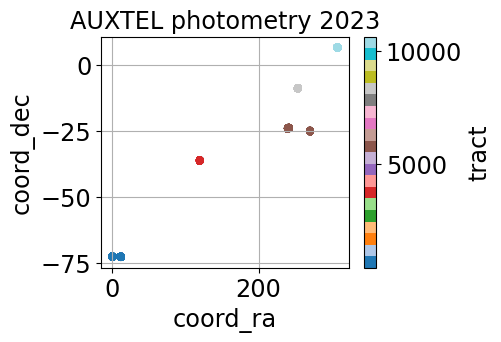

In [26]:
df_sel.plot.scatter(x='coord_ra',y='coord_dec',c='tract',colormap='tab20',grid=True,title="AUXTEL photometry 2023")

## Galactic plane

In [27]:
gal_long = np.linspace(-180.,180,360)
gal_lat = np.zeros((360))

In [28]:
coordinates_galactic_planes = SkyCoord(l=gal_long*u.degree, b=gal_lat*u.degree, frame='galactic')
gp_radec = coordinates_galactic_planes.transform_to('icrs')  

In [34]:
gp_ra_toplot = coordinates.Angle(gp_radec.ra.degree*u.degree)
gp_ra_toplot = gp_ra_toplot.wrap_at(180*u.degree)


### The object coordinates

In [35]:
ra = coord.Angle(df_sel["coord_ra"].values, unit=u.degree)
dec = coord.Angle(df_sel["coord_dec"].values, unit=u.degree)

In [36]:
ra  = ra.wrap_at(180*u.degree).radian
dec = dec.radian

In [37]:
df_sel["RA"] = ra
df_sel["DEC"] = dec

/tmp/ipykernel_46291/1807317920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel["RA"] = ra
/tmp/ipykernel_46291/1807317920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel["DEC"] = dec


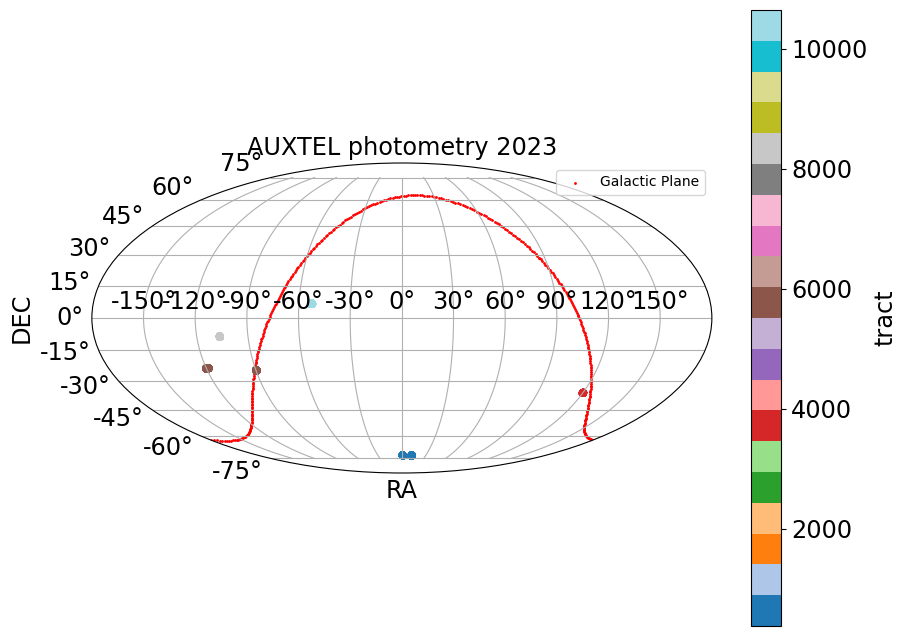

In [40]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection="aitoff")
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(gp_ra_toplot.radian, gp_radec.dec.radian,c="r",label="Galactic Plane",s=1)
df_sel.plot.scatter(x='RA',y='DEC',c='tract',colormap='tab20',grid=True,ax=ax,figsize=(10,8),title='AUXTEL photometry 2023')
ax.legend()